<a href="https://colab.research.google.com/github/gundaminpde/2022/blob/main/GAN_Smile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
## 웃는 얼굴 만들기
## Dataset은 아래 주소 Smiling or Not | Face Data 에서 퍼었음.
### https://www.kaggle.com/datasets/chazzer/smiling-or-not-face-data

from google.colab import drive 
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
pwd

'/content'

In [19]:
cd drive/MyDrive/smile

/content/drive/MyDrive/smile


Text(0.5, 1.0, 'Simle')

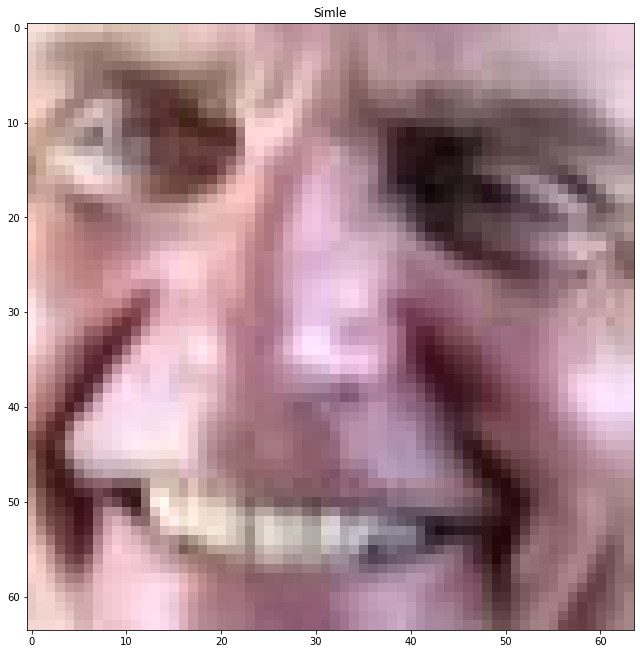

In [20]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('smile/James_Jones_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('Simle')

In [ ]:
image_sample.shape

(64, 64, 3)

In [ ]:
pwd


'/content/drive/MyDrive/smile'

In [21]:
cd ..

/content/drive/MyDrive


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환
    )

train = train_gen.flow_from_directory(directory='smile',
                                              target_size=(64, 64),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              color_mode='rgb',      # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                             # class_mode='categorical'
                                              batch_size=1)
                                             # shuffle=True)
len(train[0][0])

train[0][0][0] ## 첫번째 배치의 첫번째



Found 600 images belonging to 1 classes.


array([[[0.15686275, 0.09803922, 0.02352941],
        [0.17254902, 0.10980393, 0.04705883],
        [0.18039216, 0.11764707, 0.06666667],
        ...,
        [0.4901961 , 0.34117648, 0.19607845],
        [0.44705886, 0.29803923, 0.15294118],
        [0.42352945, 0.27450982, 0.12941177]],

       [[0.14509805, 0.08235294, 0.01960784],
        [0.15686275, 0.09411766, 0.03529412],
        [0.16862746, 0.10196079, 0.0627451 ],
        ...,
        [0.47058827, 0.32156864, 0.1764706 ],
        [0.43921572, 0.2901961 , 0.14509805],
        [0.43529415, 0.28627452, 0.14117648]],

       [[0.1254902 , 0.0627451 , 0.00392157],
        [0.13725491, 0.07450981, 0.02352941],
        [0.14117648, 0.08627451, 0.04313726],
        ...,
        [0.45882356, 0.30980393, 0.16862746],
        [0.42352945, 0.27450982, 0.13333334],
        [0.42352945, 0.27450982, 0.13333334]],

       ...,

       [[0.21176472, 0.10196079, 0.04705883],
        [0.18431373, 0.08235294, 0.03137255],
        [0.19215688, 0

In [ ]:
train[0][0][0].shape

(64, 64, 3)

In [ ]:
train[0][0].shape

(1, 64, 64, 3)

In [ ]:
type(train[0][0])

numpy.ndarray

In [ ]:
ABC = np.array(train[0][0])

BCD = np.append(ABC, train[1][0], axis =0 )

BCD.shape

(2, 64, 64, 3)

In [23]:
X_train = np.array(train[0][0])

for i in range(1,600):
  X_train = np.append(X_train, train[i][0], axis = 0)

X_train.shape


(600, 64, 64, 3)

4/4 [==============================] - 0s 6ms/step
200 [D loss: 0.170216, acc.: 100.00%] [G loss: 2.006624]
4/4 [==============================] - 0s 6ms/step
400 [D loss: 0.651272, acc.: 83.59%] [G loss: 0.770145]
4/4 [==============================] - 0s 6ms/step
600 [D loss: 0.560260, acc.: 74.22%] [G loss: 1.079719]
4/4 [==============================] - 0s 7ms/step
800 [D loss: 0.762659, acc.: 20.70%] [G loss: 0.640130]
4/4 [==============================] - 0s 8ms/step
1000 [D loss: 0.508799, acc.: 98.44%] [G loss: 1.089842]
4/4 [==============================] - 0s 8ms/step
1200 [D loss: 0.779895, acc.: 41.80%] [G loss: 0.994721]
4/4 [==============================] - 0s 9ms/step
1400 [D loss: 0.483516, acc.: 78.52%] [G loss: 1.462482]
4/4 [==============================] - 0s 9ms/step
1600 [D loss: 0.652185, acc.: 61.72%] [G loss: 0.905741]
4/4 [==============================] - 0s 11ms/step
1800 [D loss: 0.662199, acc.: 66.41%] [G loss: 1.201462]
4/4 [=========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


4/4 [==============================] - 0s 8ms/step
4400 [D loss: 0.839756, acc.: 46.09%] [G loss: 0.619253]
4/4 [==============================] - 0s 7ms/step
4600 [D loss: 0.853367, acc.: 15.23%] [G loss: 0.609462]
4/4 [==============================] - 0s 8ms/step
4800 [D loss: 0.683989, acc.: 56.64%] [G loss: 0.775392]
4/4 [==============================] - 0s 8ms/step
5000 [D loss: 0.513269, acc.: 78.91%] [G loss: 1.669997]
1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:138: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


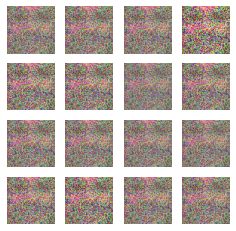

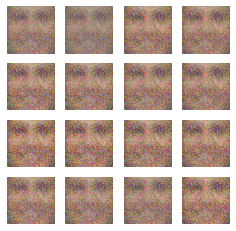

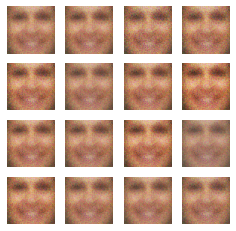

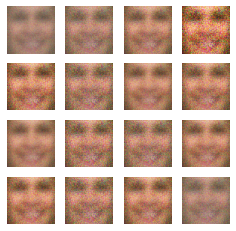

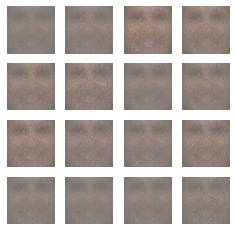

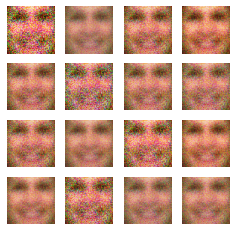

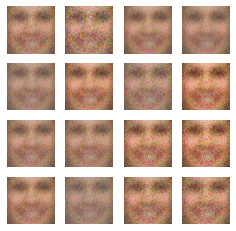

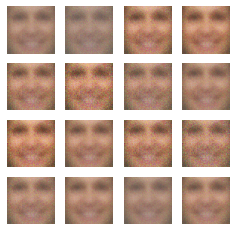

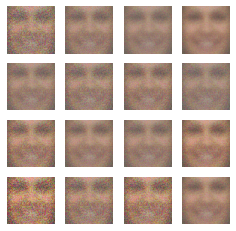

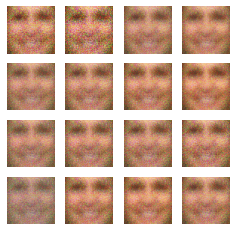

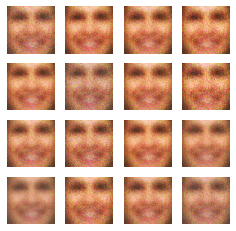

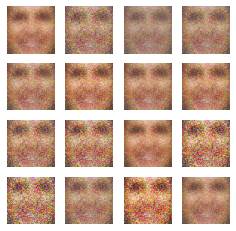

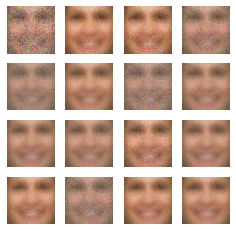

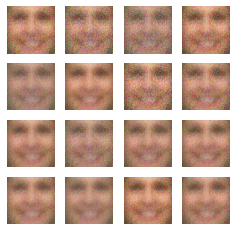

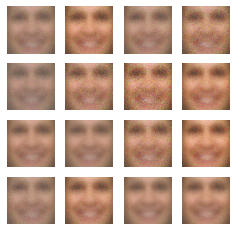

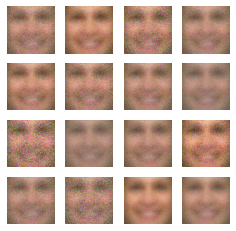

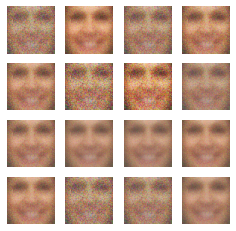

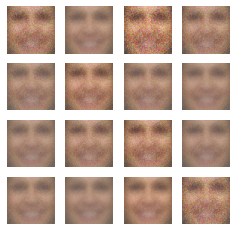

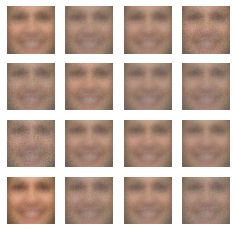

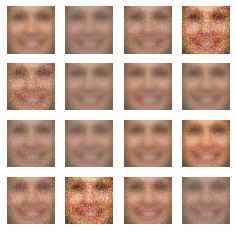

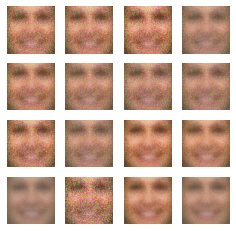

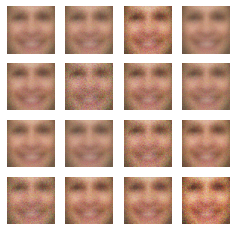

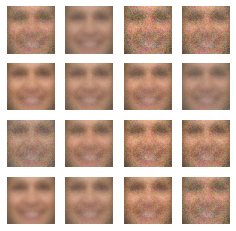

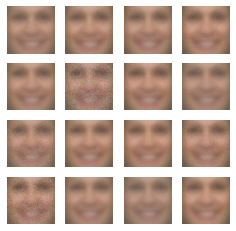

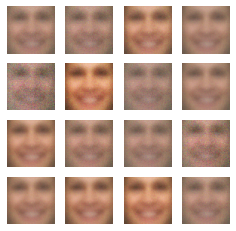

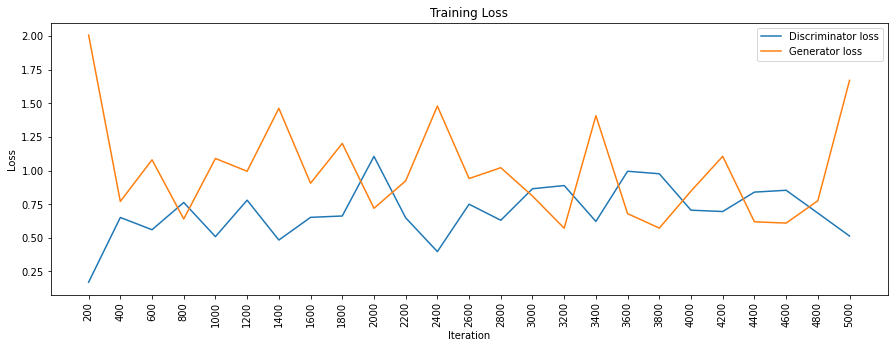

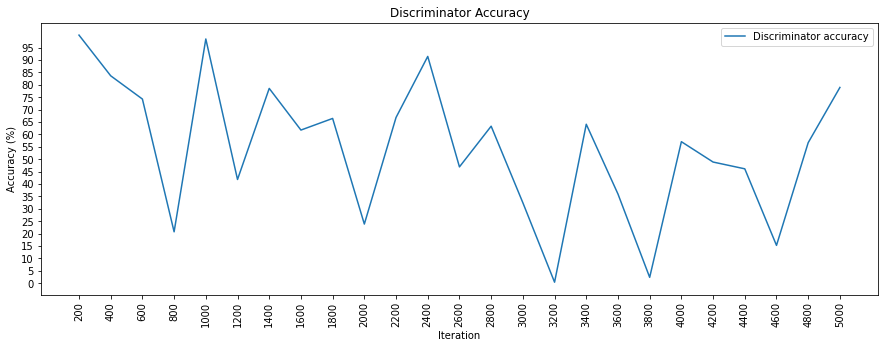

In [24]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam


img_rows = 64
img_cols = 64
channels = 3
img_shape = (img_rows, img_cols, channels)
z_dim = 100


def build_generator(img_shape, z_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(64 * 64 * 3, activation='sigmoid'))
    model.add(Reshape(img_shape))

    return model


def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))

    return model


def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)

    return model


discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(),
                      metrics=['accuracy'])

generator = build_generator(img_shape, z_dim)


gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

losses = []
accuracies = []
iteration_checkpoints = []




def train(iterations, batch_size, sample_interval, X_train2):
    
    X_train = X_train2 
 ###   X_train = np.expand_dims(X_train, axis=3)

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        z = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)



def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    gen_imgs = generator.predict(z)
    ###gen_imgs = 0.5*gen_imgs

    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, :] )#, cmap='gray')
            axs[i, j].axis('off')
            cnt += 1


iterations = 5000
batch_size = 128
sample_interval = 200

train(iterations, batch_size, sample_interval, X_train)

losses = np.array(losses)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

accuracies = np.array(accuracies)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()
